# Курс "Программирование на языке Python. Уровень 4. Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

## Модуль 8. Библиотека matplotlib: визуализация данных

1. Классификация информации цветом, формой линий и отметок
2. Аннотации для аналитических данных
3. Многофакторный визуальный анализ
2. Работа с изображениями
5. Графики в 3D и heatmaps

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 10.0)

### Классификация информации цветом и формой

Обратите внимание на второй параметр функции ```plot()```

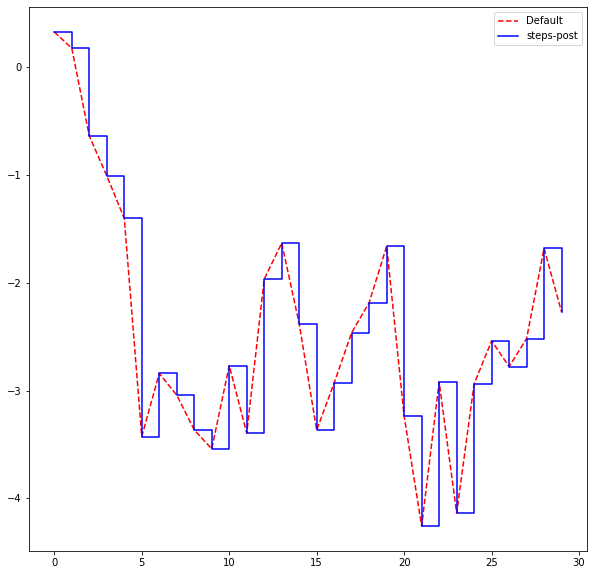

In [4]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'r--', label='Default')
plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Первый вызов эквивалентен вызову функции с параметрами ```color='r', linestyle='dashed'```

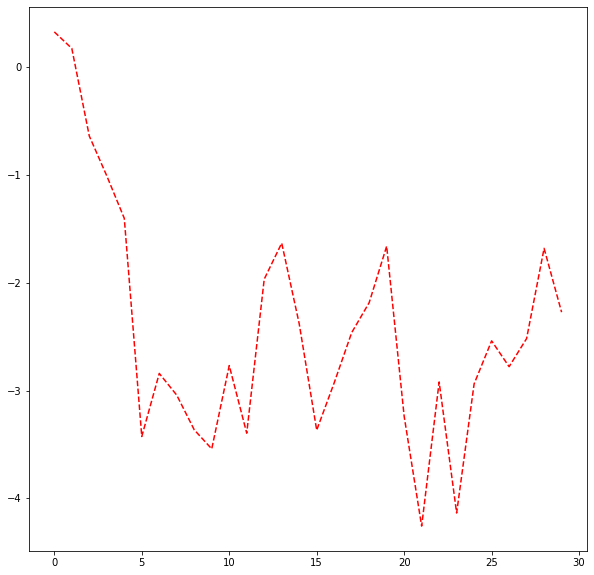

In [5]:
plt.plot(data, color='r', linestyle='dashed', label='Default')

Ознакомиться со всеми возможными стилями линий можно на сайте Matplotlib:
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/linestyles.html

Можно добавить маркеры:

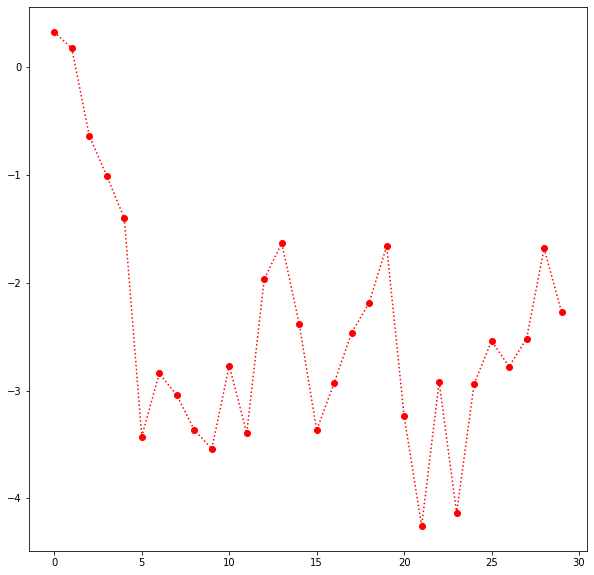

In [6]:
plt.plot(data, color='r', linestyle='dotted', label='Default', marker='o')

На графики также можно наносить пояснительные надписи с указанием на те или иные точки:

Text(0.5, 1.0, 'Важнейшие даты кризиса 2008-2009 гг')

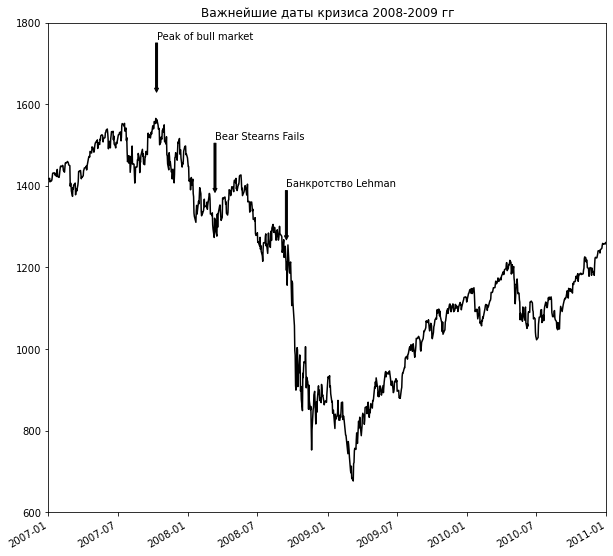

In [7]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Банкротство Lehman')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Важнейшие даты кризиса 2008-2009 гг')

В задачах классификации иногда нужно представить пространственное распределение тех или иных признаков.

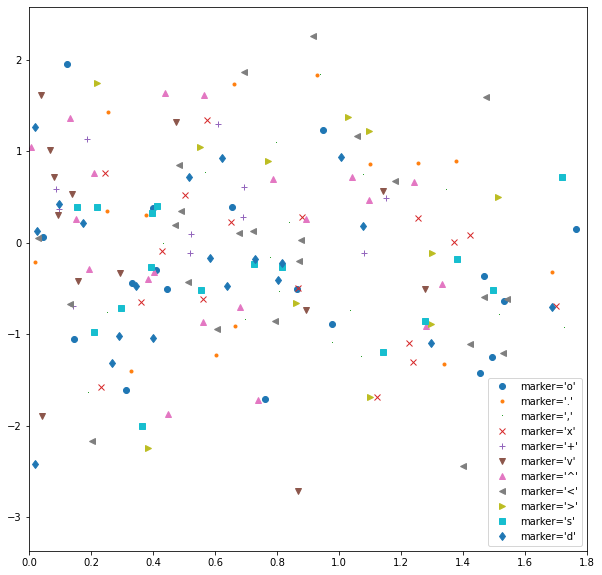

In [19]:
rng = np.random.RandomState(0)
n = 30
for i, marker in enumerate(['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']):
    plt.plot(rng.randn(n) + 0.2*(i % 4), rng.randn(n) - 0.05*(i % 4), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

__ЗАДАНИЕ__ Для набора данных "Ирисы" выведите графики рассеяния для комбинаций различных признаков.

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


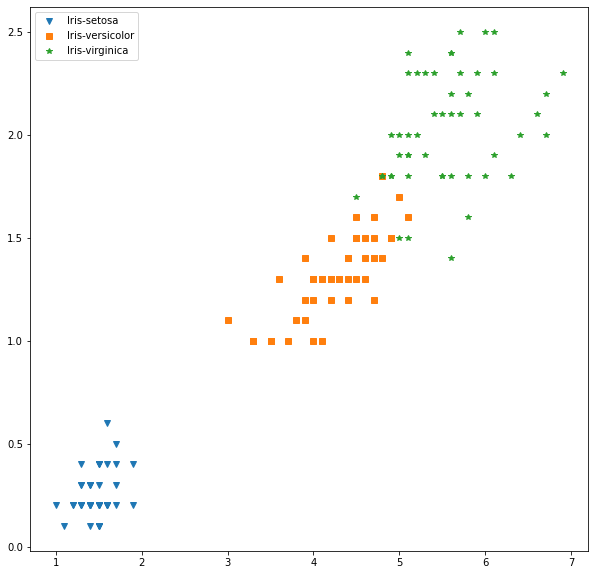

In [58]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')

iris_data = iris[:, :-1].astype(dtype=np.float64)
iris_name = iris[:,-1].astype(str)

# ваш код здесь


features = (2, 3)
classes = np.unique(iris_name).astype(str)
print(classes)
markers = ['v', 's', '*']


for i, marker in enumerate(markers):
    bool_index = (iris_name == classes[i])    
    plt.plot(iris_data[bool_index][:, features[0]], iris_data[bool_index][:, features[1]], marker, label=classes[i])

plt.legend(loc='best')
plt.show()
#plt.scatter?


### Гистограммы и многофакторное сравнение

Рассмотрим на примере датасета tips.csv. Рассмотрим функции ```hist()```, ```barplot()``` и ознакомимся с базовыми возможностями пакета ```seaborn```.

In [59]:
tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Средства для многофактороного сравнения по категориям встроены в Pandas. Посмотрим на примере распределения количества человек за одним столом в зависимости от дня недели:

In [60]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts = party_counts.reindex(['Thur', 'Fri', 'Sat', 'Sun'])
party_counts = party_counts.loc[:, 2:5]  # уберем данные по столикам с 1 и 6 гостями, это редкие случаи
print(party_counts)

size   2   3   4  5
day                
Thur  48   4   5  1
Fri   16   1   1  0
Sat   53  18  13  1
Sun   39  15  18  3


Вызовем из свойства ```plot``` нашего dataframe'а функцию ```bar()```:

<AxesSubplot:xlabel='day'>

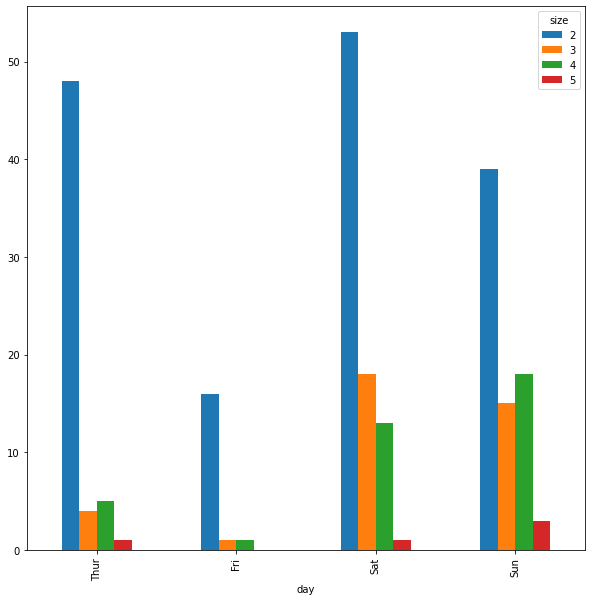

In [61]:
party_counts.plot.bar()

Пакет seaborn - средство более высокого уровня и в некоторых случаях берет на себя всю необходимую предообработку данных. Например, давайте посмотрим на зависимость чаевых от дня недели:

In [62]:
tips['tips_pct'] = tips['tip'] / tips['total_bill']

<AxesSubplot:xlabel='tips_pct', ylabel='day'>

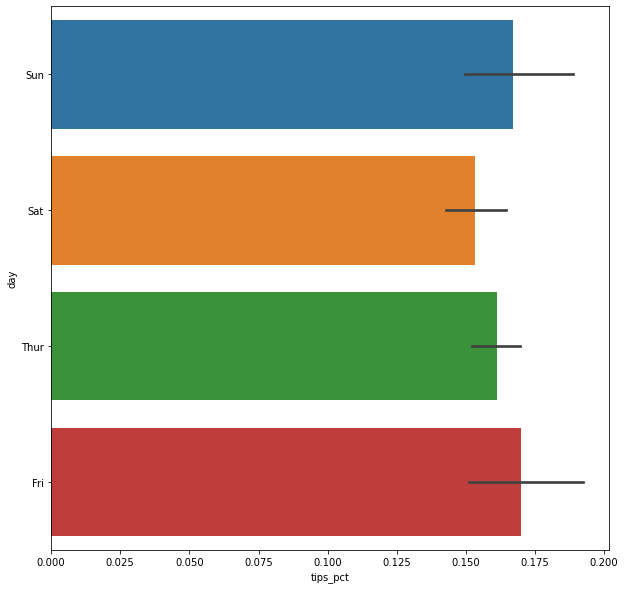

In [63]:
sns.barplot(x='tips_pct', y='day', data=tips, orient='h')

А теперь - процент чаевых не только ото дня, но и от времени суток, для этого введем еще один параметр ```hue``` (цвет).

<AxesSubplot:xlabel='tips_pct', ylabel='day'>

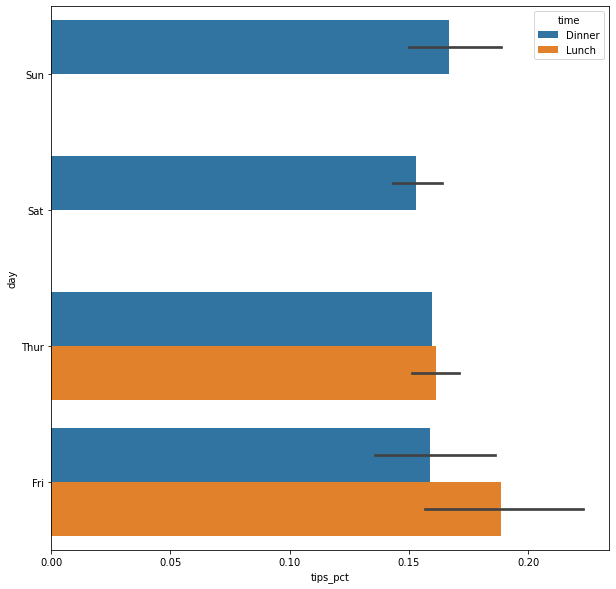

In [64]:
sns.barplot(x='tips_pct', y='day', hue='time', data=tips, orient='h')

Если нам нужно вывести дополнительные показатели, можем воспользоваться фасетной сеткой, которую также предоставляет нам seaborn. Отчет по тому же самому + признак "стол курящий/некурящий".

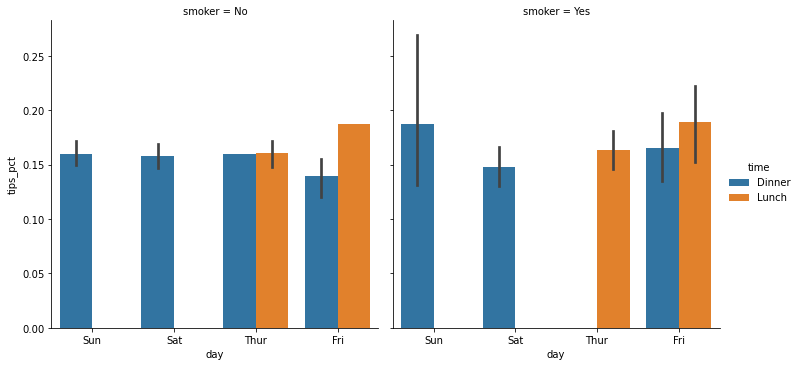

In [65]:
sns.catplot(x='day', y='tips_pct', hue='time', col='smoker',
               kind='bar', data=tips)

Такую "сетку" можно распространить на все категороиальные признаки:

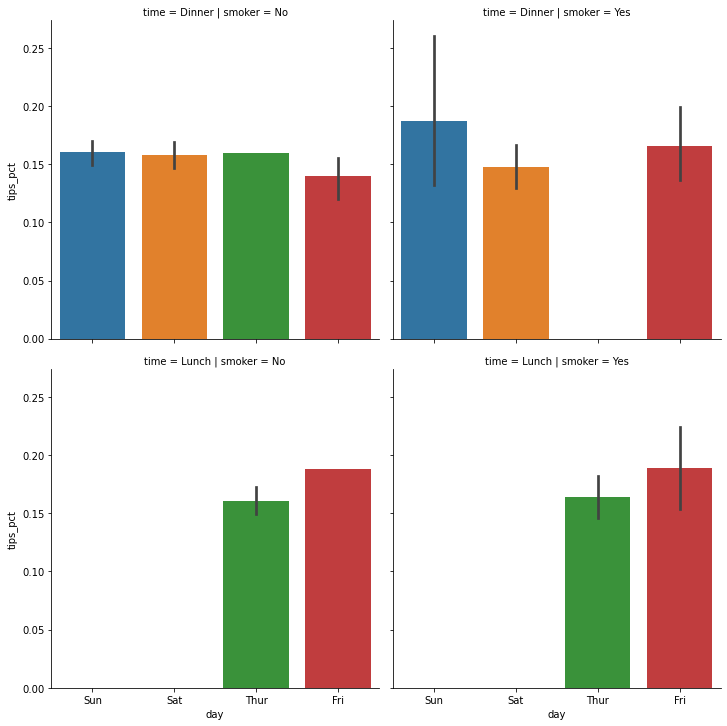

In [66]:
sns.catplot(x='day', y='tips_pct', row='time',
               col='smoker',
               kind='bar', data=tips)

__ЗАДАНИЕ__ Выведите на экран зависимости процента чаевых от пола, времени и дня недели.

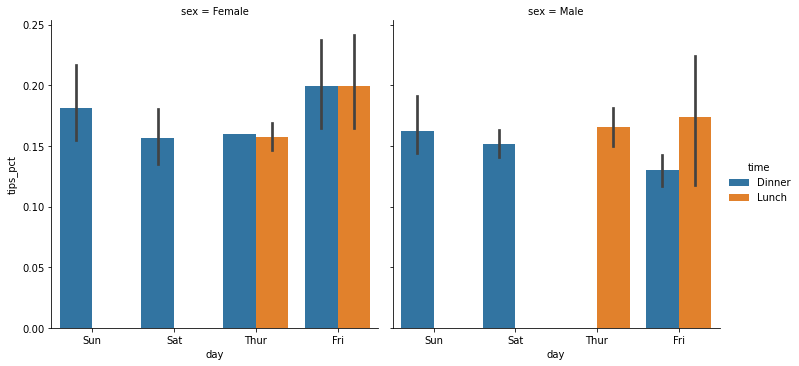

In [67]:
sns.catplot(x='day', y='tips_pct', hue='time', col='sex',
               kind='bar', data=tips)

Вернемся к нашим девушкам из журнала Playboy:

In [68]:
df_playboy = pd.read_csv('data/girls.csv')
df_playboy.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


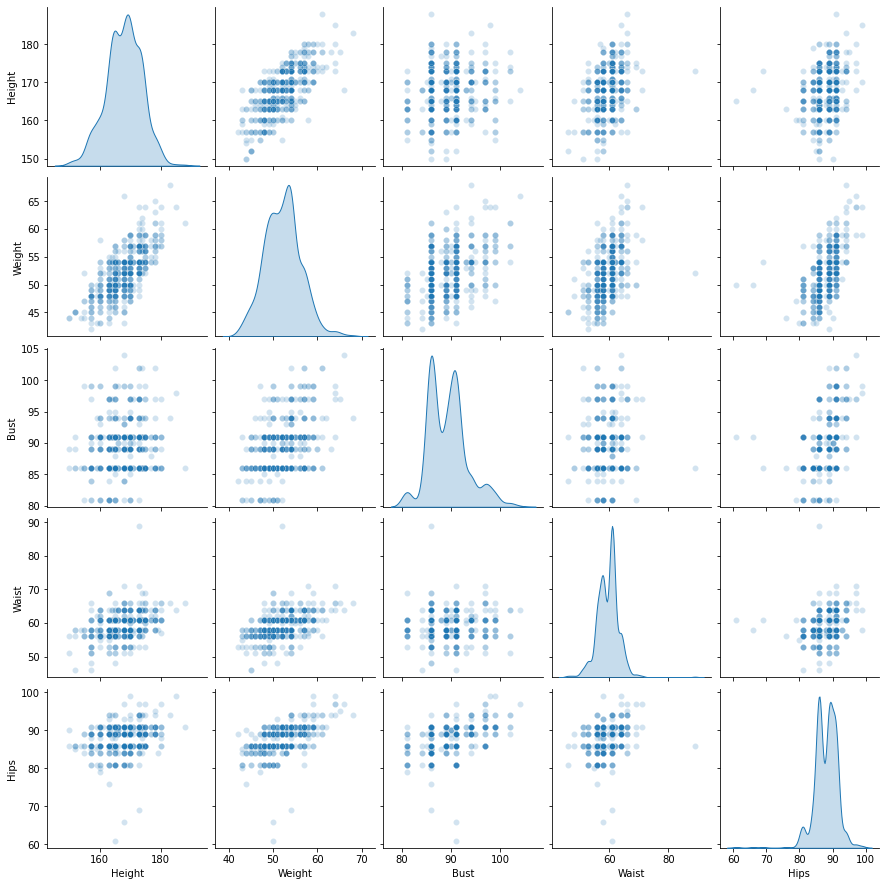

In [69]:
sns.pairplot(df_playboy, vars=['Height', 'Weight', 'Bust', 'Waist', 'Hips'], diag_kind='kde', plot_kws={'alpha': 0.2})

### Работа с графическими изображениями

Выведем фото девушки месяца за ноябрь 1972 года.

In [70]:
import matplotlib.image as mpimg
lena = mpimg.imread('data/lena.jpg')


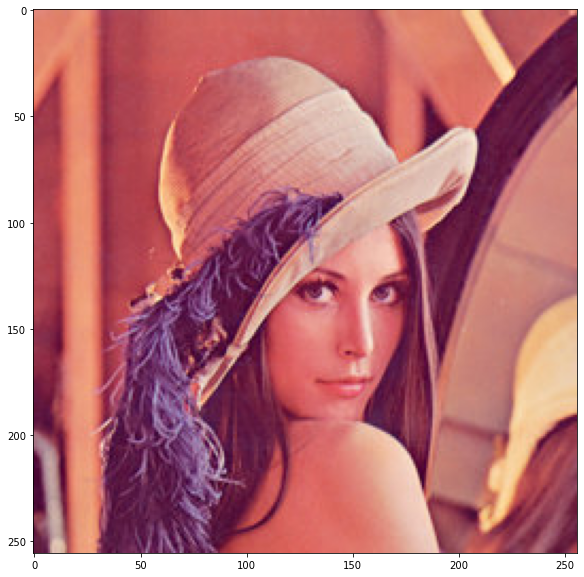

In [71]:
plt.imshow(lena)

In [72]:
lena.shape

(256, 256, 3)

In [73]:
lena

array([[[225, 135, 124],
        [225, 135, 124],
        [225, 135, 124],
        ...,
        [230, 144, 127],
        [229, 142, 122],
        [215, 127, 103]],

       [[226, 136, 125],
        [225, 135, 124],
        [225, 136, 122],
        ...,
        [249, 157, 144],
        [239, 147, 132],
        [207, 114,  97]],

       [[225, 136, 122],
        [225, 136, 122],
        [226, 134, 119],
        ...,
        [231, 136, 134],
        [213, 119, 119],
        [177,  85,  86]],

       ...,

       [[ 91,  25,  63],
        [ 95,  30,  64],
        [ 98,  31,  62],
        ...,
        [139,  52,  71],
        [157,  59,  74],
        [166,  61,  75]],

       [[ 90,  24,  62],
        [ 93,  28,  60],
        [ 96,  29,  60],
        ...,
        [156,  63,  82],
        [171,  66,  80],
        [177,  66,  75]],

       [[ 88,  22,  60],
        [ 90,  25,  57],
        [ 93,  26,  57],
        ...,
        [168,  71,  90],
        [180,  73,  83],
        [185,  70,  77]]

Построим гистограмму распределения яркостей, для этого приведем "Лену" в одноканальный вариант:

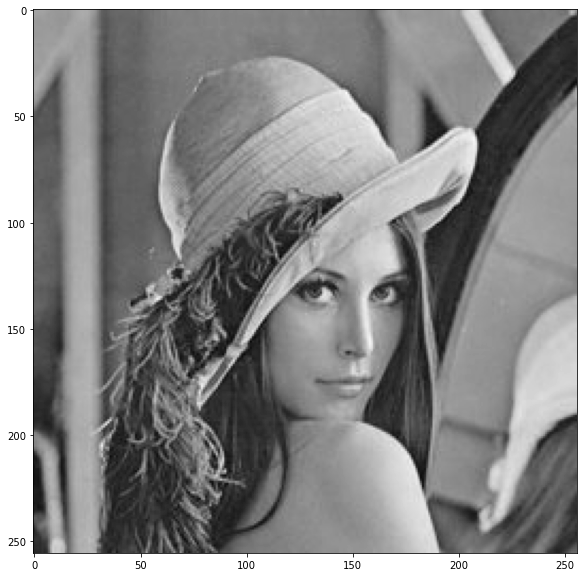

In [80]:
lena_gray = (np.sum(lena, axis=2) / 3)
plt.imshow(lena_gray, cmap='gray')


Теперь по всему множеству пикселей построим гистограмму их интенсивности:

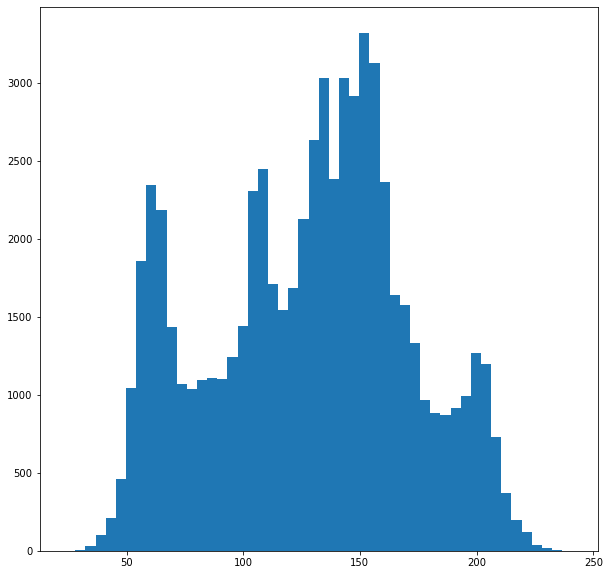

In [75]:
plt.hist(lena_gray.ravel(), bins=50)
plt.show()

__ЗАДАНИЕ__ На одной иллюстрации выведите изображение всех трех каналов R G B и постройте гистограммы для каждого канала. Подсказка: используйте ```plt.subplots(2,3)```

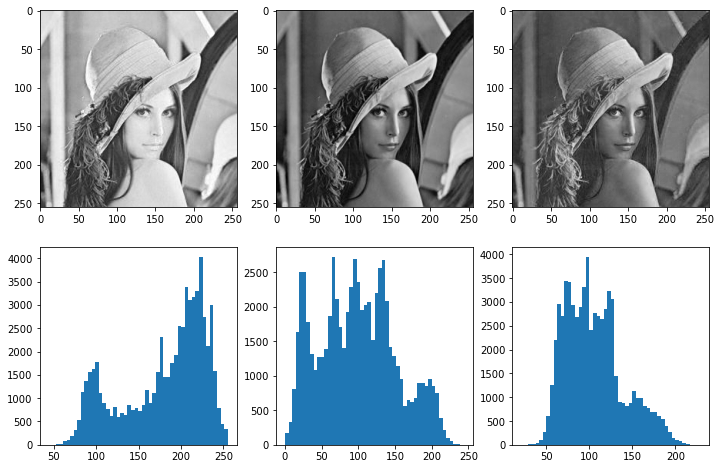

In [103]:
fig, axs = plt.subplots(2, 3)

fig.set_size_inches(12,8)

for i_channel in range(lena.shape[2]):
    channel = lena[:, :, i_channel]
    axs[0, i_channel].imshow(channel, cmap='gray')
    axs[1, i_channel].hist(channel.ravel(), bins=50)    


#plt.show()


### 3D-графики

Возможно, что для их построения придется доустановить некоторые модули.

Точно также создаем ```axes```:

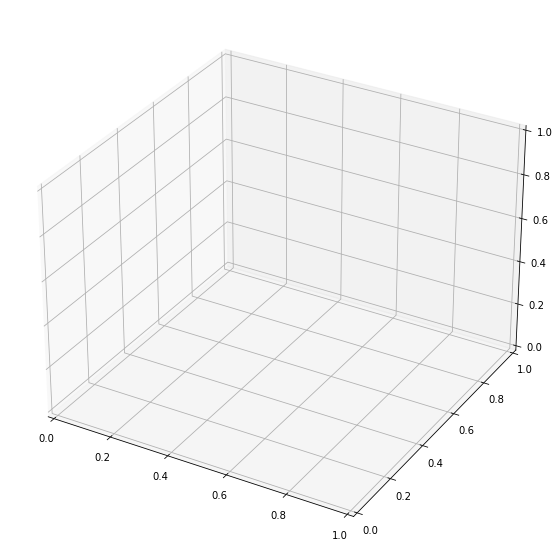

In [104]:
fig = plt.figure()
ax = plt.axes(projection='3d')

3-е измерение функции строится поверх конструкции ```meshgrid```, которая по сути является координатной сеткой для каждой точки функции.


In [106]:
x = np.arange(1, 5).astype(dtype=np.float64)
y = np.arange(7, 4, -1).astype(dtype=np.float64)
XY = np.meshgrid(x, y)
XY

[array([[1., 2., 3., 4.],
        [1., 2., 3., 4.],
        [1., 2., 3., 4.]]),
 array([[7., 7., 7., 7.],
        [6., 6., 6., 6.],
        [5., 5., 5., 5.]])]

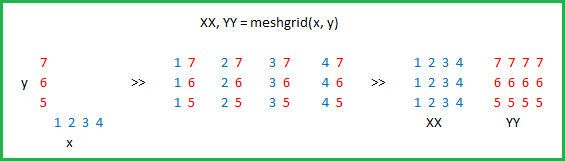

In [107]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Контуры поверхности строятся функциями ```ax.contour3D(X, Y, Z)```, ```plot_surface(X, Y, Z)```, ```plot_wireframe(X, Y, Z)``` и многими другими.

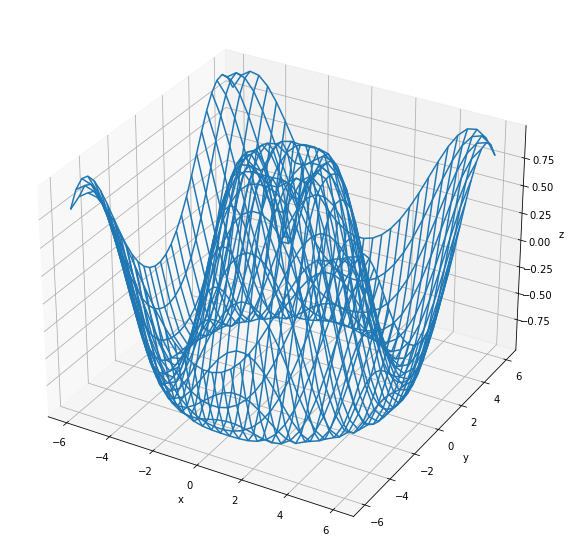

In [108]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.plot_surface(X, Y, Z)
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Также можно делать "температурные карты" - heatmaps, используя встроенные в ```matplotlib``` цветовые схемы. Проиллюстрируем это на примере с параболоидом:

In [113]:
# создаем параболоид
m = 3
n = 2
b = 1
d = 0.75
def f(x, y):
    return (x + m) ** 2 + (y * d + n) ** 2 + b

x = np.linspace(-6-m, 6-m, 100)
y = np.linspace(-6-n, 6-n, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

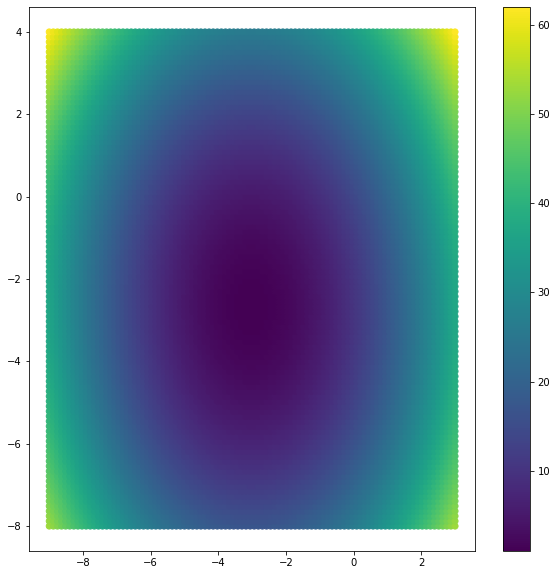

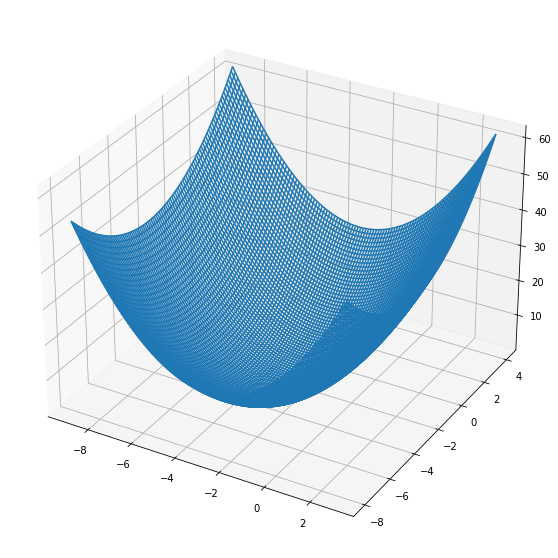

In [116]:
cm = plt.cm.get_cmap('viridis')
plt.scatter(X, Y, c=Z, cmap=cm)
plt.colorbar()
plt.show()


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)

Также эти данные можно визуализировать горизонталями:

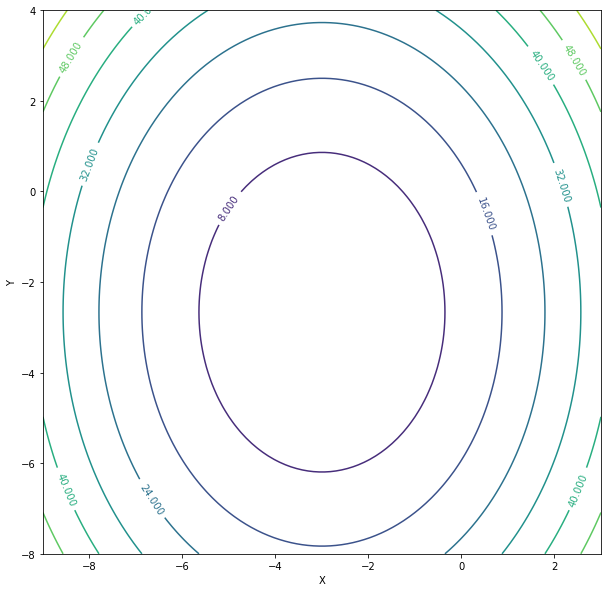

In [117]:
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Можно комбинировать оба способа:

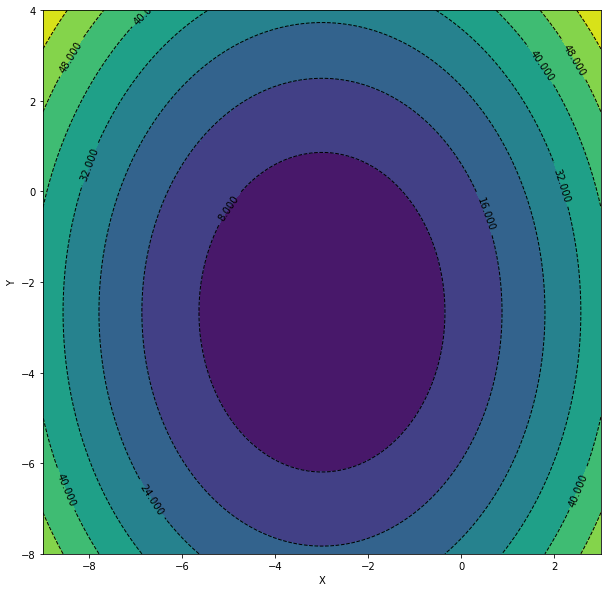

In [118]:
cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X, Y, Z, )
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

__ЗАДАНИЕ__ 

На примере данных, сгенерированных функцией $z = (x + m)^2 + (y + n)^2 + b$ (параболоид) сделайте срезы по случайным значениям x, y, z, отобразите их в виде графиков. 

Реализуйте функцию градиентного спуска в трехмерном пространстве на этих данных.  Проиллюстрируйте ее векторами на проекции на плоскость $XY$.

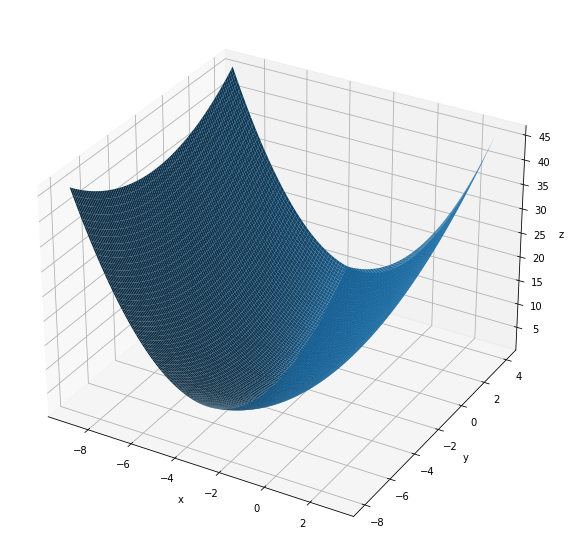

In [136]:
m = 3
n = 2
b = 1
d = 0.5
def f(x, y):
    return (x + m) ** 2 + (d*(y + n)) ** 2 + b

x = np.linspace(-6-m, 6-m, 100)
y = np.linspace(-6-n, 6-n, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()


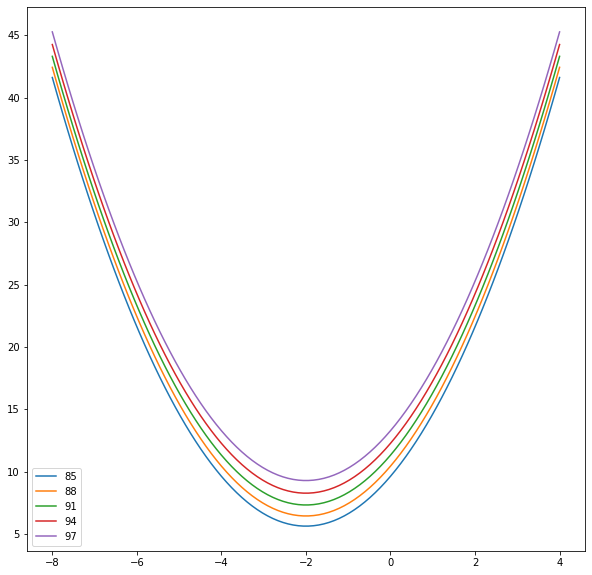

In [143]:
x_slice_ix = np.random.randint(x.shape[0])
for i in range(5):
    x_slice_ix += 3
    plt.plot(y, Z[x_slice_ix, :], label=f"{x_slice_ix}")
plt.legend(loc="best")

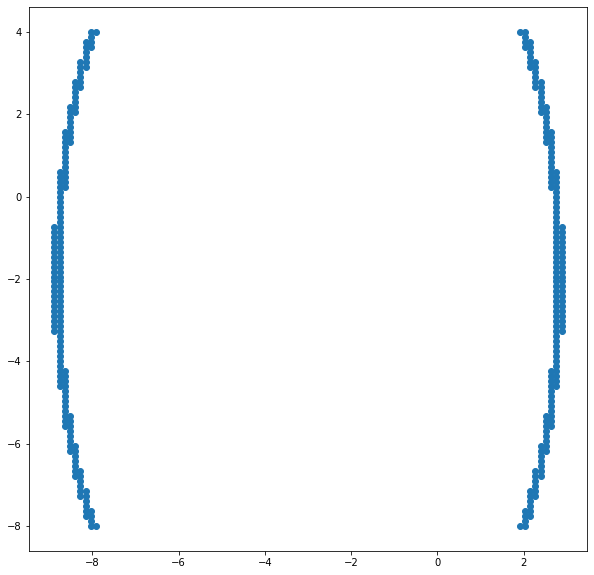

In [158]:
z_val = np.random.randint(Z.min(), Z.max())
bias = 1


z_mask = ( (Z >= z_val - bias) & (Z<= z_val + bias))
plt.scatter(X[z_mask], Y[z_mask])